# 문제 1

#### dataset : pima-indians-diabetes-database [kaggle link](pima-indians-diabetes-database) - added post-processing
/kaggle/input/adpkrp5/data1.csv

In [1]:
%pwd

'C:\\Users\\s7s71\\2_data_22'

### 1-1 탐색적 데이터 분석 수행(시각화 포함)

In [2]:
import pandas as pd
df = pd.read_csv('data1.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,81.976562,20.536458,79.799479,44.934766,0.471876,34.447917,0.348958
std,3.369578,31.972618,358.835058,15.952218,115.244002,359.739733,0.331329,36.754727,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,9999.000000,99.000000,846.000000,9999.000000,2.420000,999.000000,1.000000


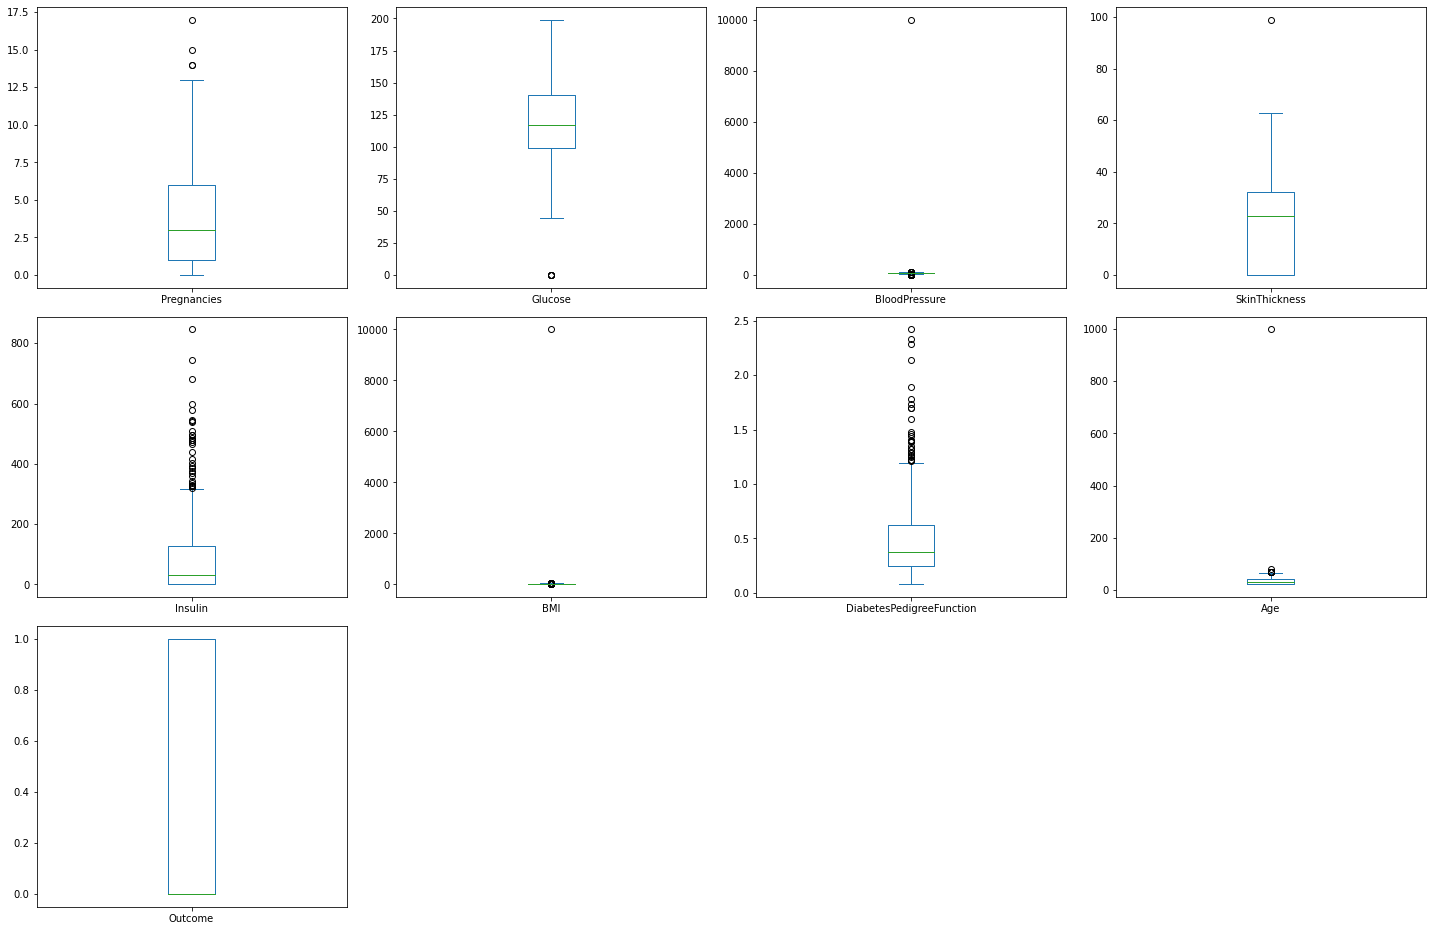

In [6]:
import matplotlib.pyplot as plt 
df.plot(kind='box',subplots=True,layout = (7,4),figsize=(20,30))
plt.tight_layout()
plt.show()

# BMI, Age, BloodPressure에 이상치 존재

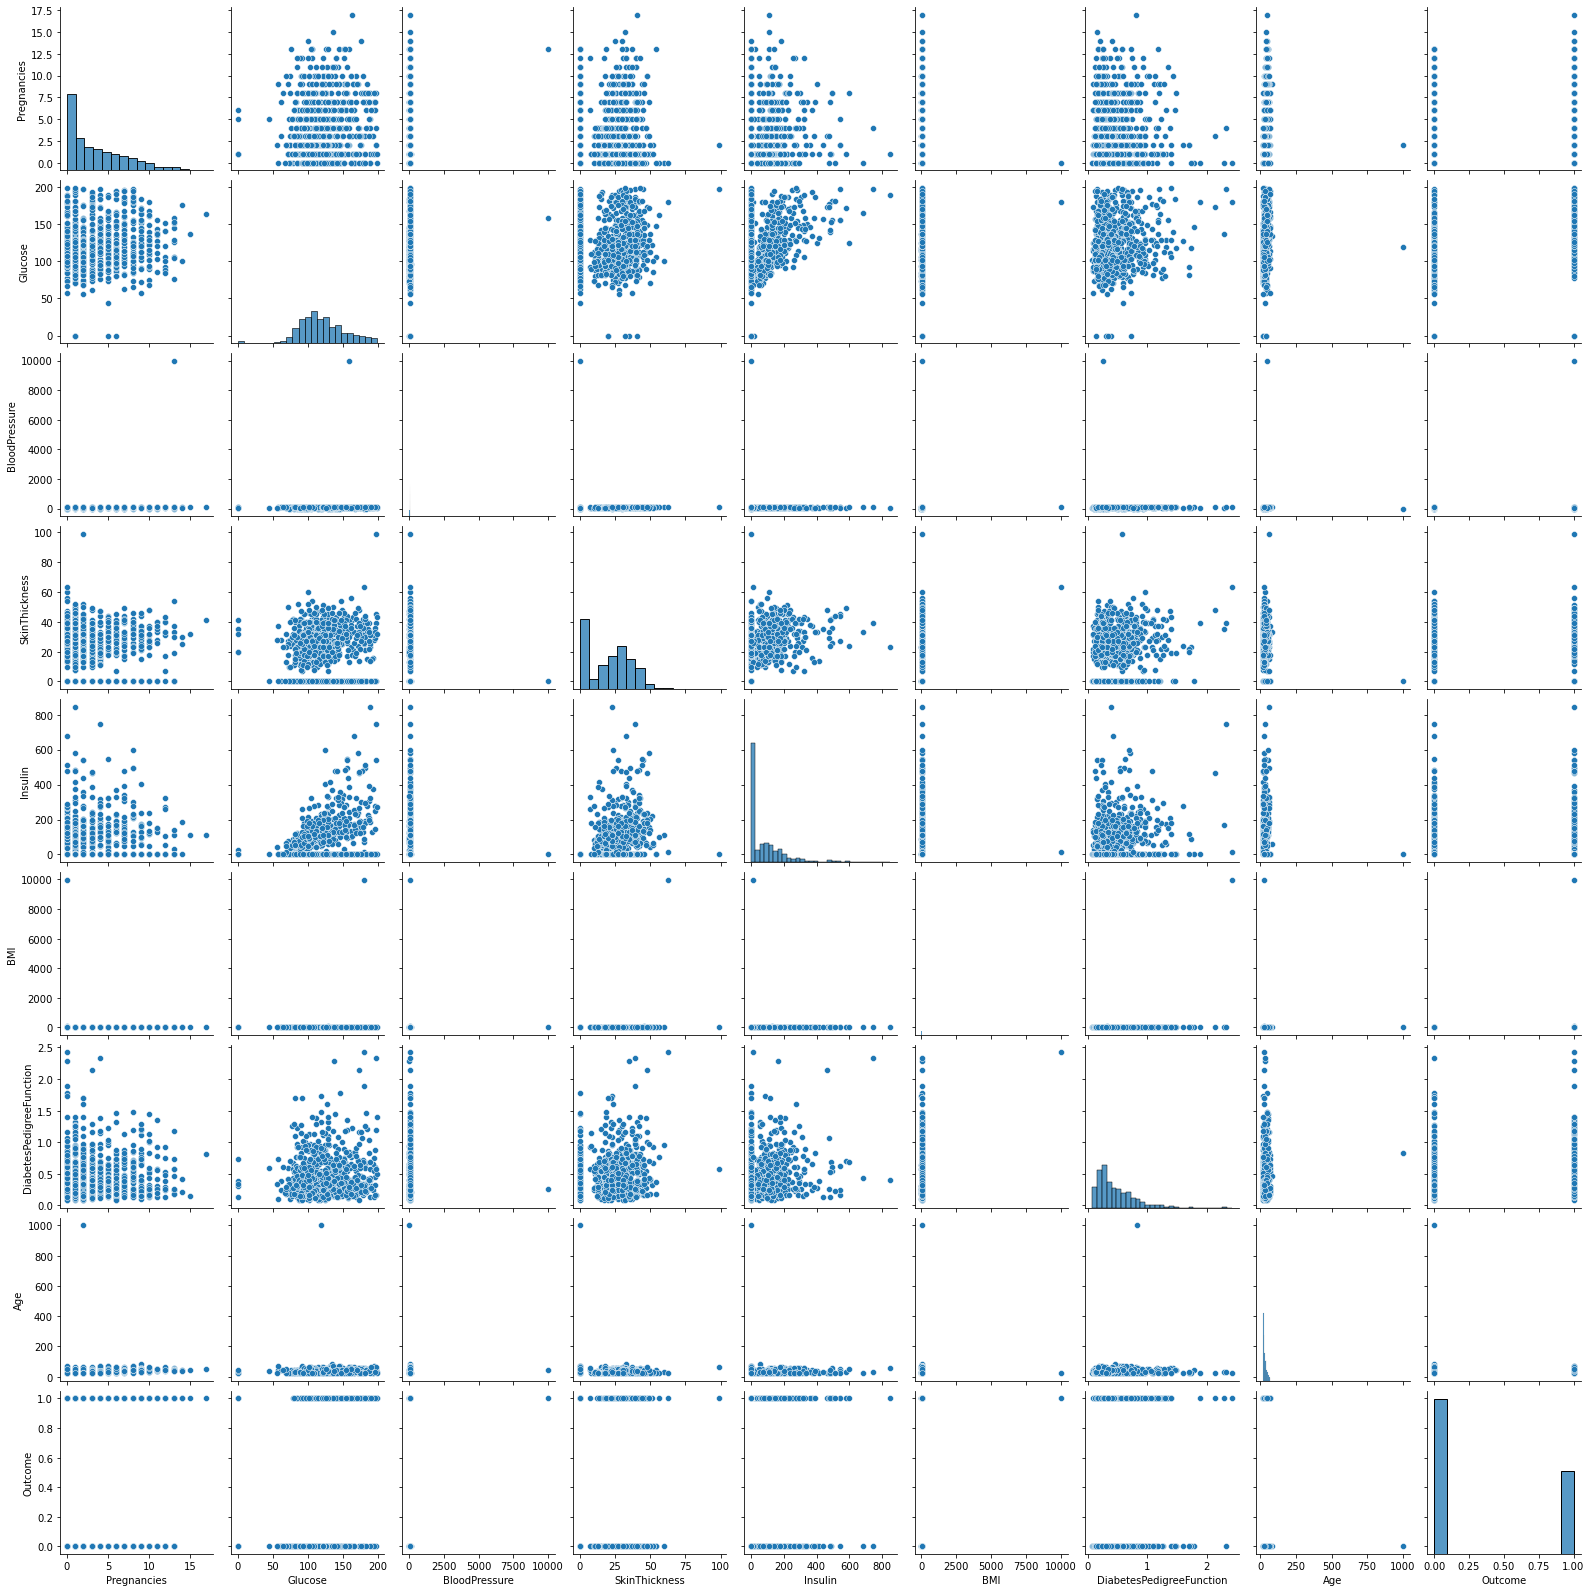

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)

In [8]:
from IPython.display import display
cate_feat = []
num_feat = []
print('numeric 타입이지만 범주형 변수의 경우 아래와 같은 분포를보인다')
for col in df.columns:
    target = df[col]
    if target.nunique() <=10:
        print(col,target.unique())
        display(target.value_counts().to_frame())
        print()
        cate_feat.append(col)
    else:
        num_feat.append(col)
print(cate_feat)
print(num_feat)

numeric 타입이지만 범주형 변수의 경우 아래와 같은 분포를보인다
Outcome [1 0]


,Outcome
0,500
1,268



['Outcome']
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


### 1-2 이상치 처리(이상값 대체방안 제시)

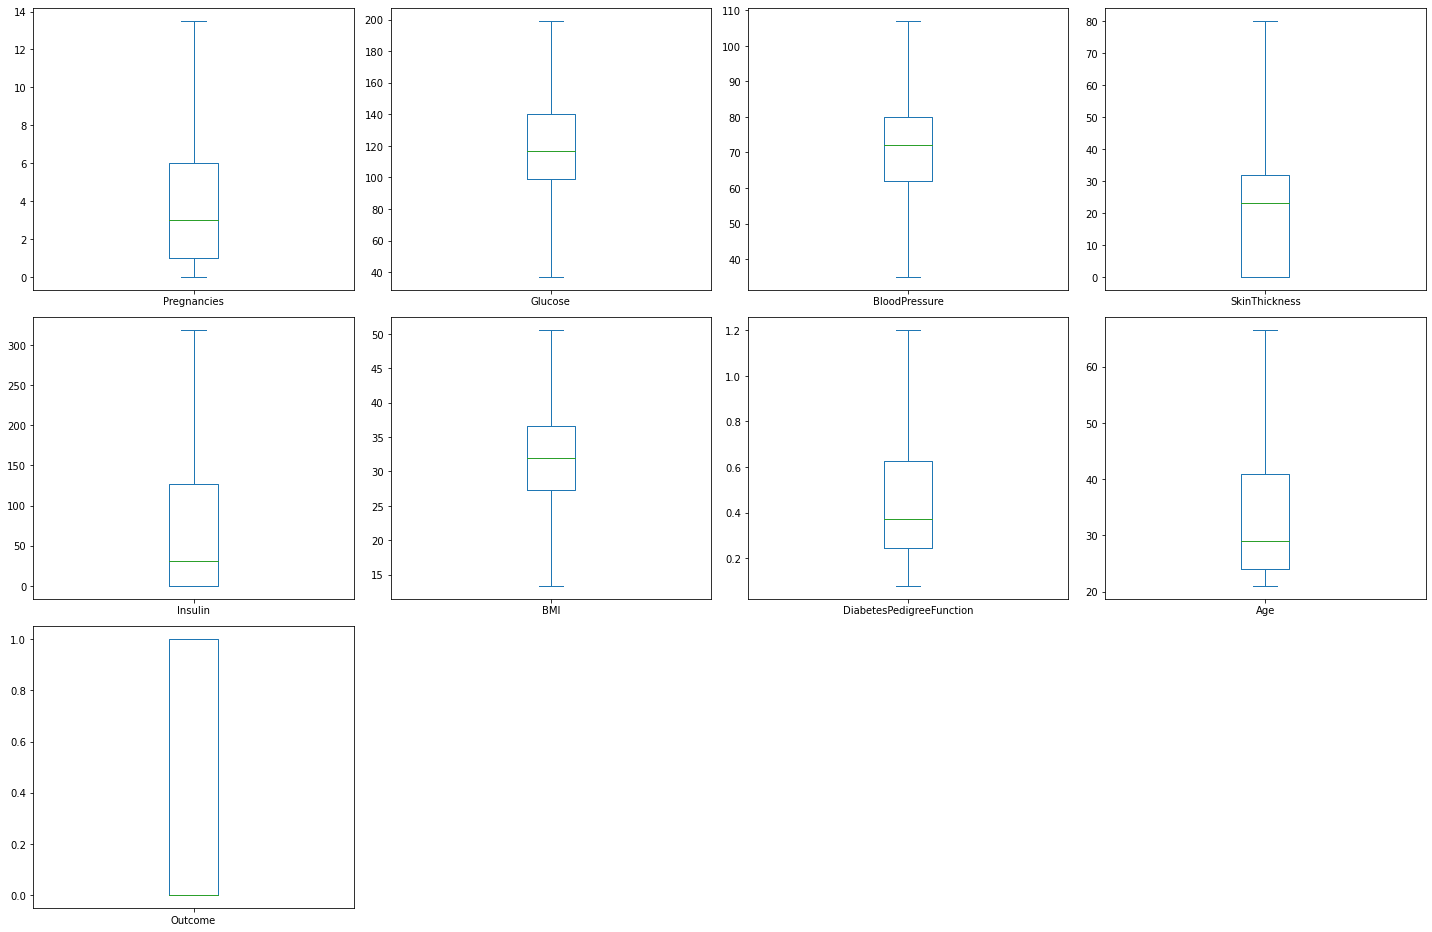

In [9]:
# BMI, Age, BloodPressure에 이상치 존재
#0, 999, 9999등의 그 예

from pandas import DataFrame, merge

df_p = df.copy()
for col in df.columns:
    if type(df[col][0]) == str: #범주형 변수는 pass
        continue
    else:
        IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
        top = df[col].quantile(0.75) + IQR*1.5
        down = df[col].quantile(0.25) - IQR*1.5
        df_p[col] = df[col].clip(top, down)


df_p.plot(kind='box',subplots=True,layout = (7,4),figsize=(20,30))
plt.tight_layout()
plt.show()

In [10]:
df_p.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.837240,121.136230,70.684896,20.511719,73.652669,32.125065,0.458914,33.199870,0.348958
std,3.344157,31.187468,14.197239,15.844744,93.576029,7.049584,0.285596,11.628404,0.476951
min,0.000000,37.125000,35.000000,0.000000,0.000000,13.350000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,13.500000,199.000000,107.000000,80.000000,318.125000,50.550000,1.200000,66.500000,1.000000


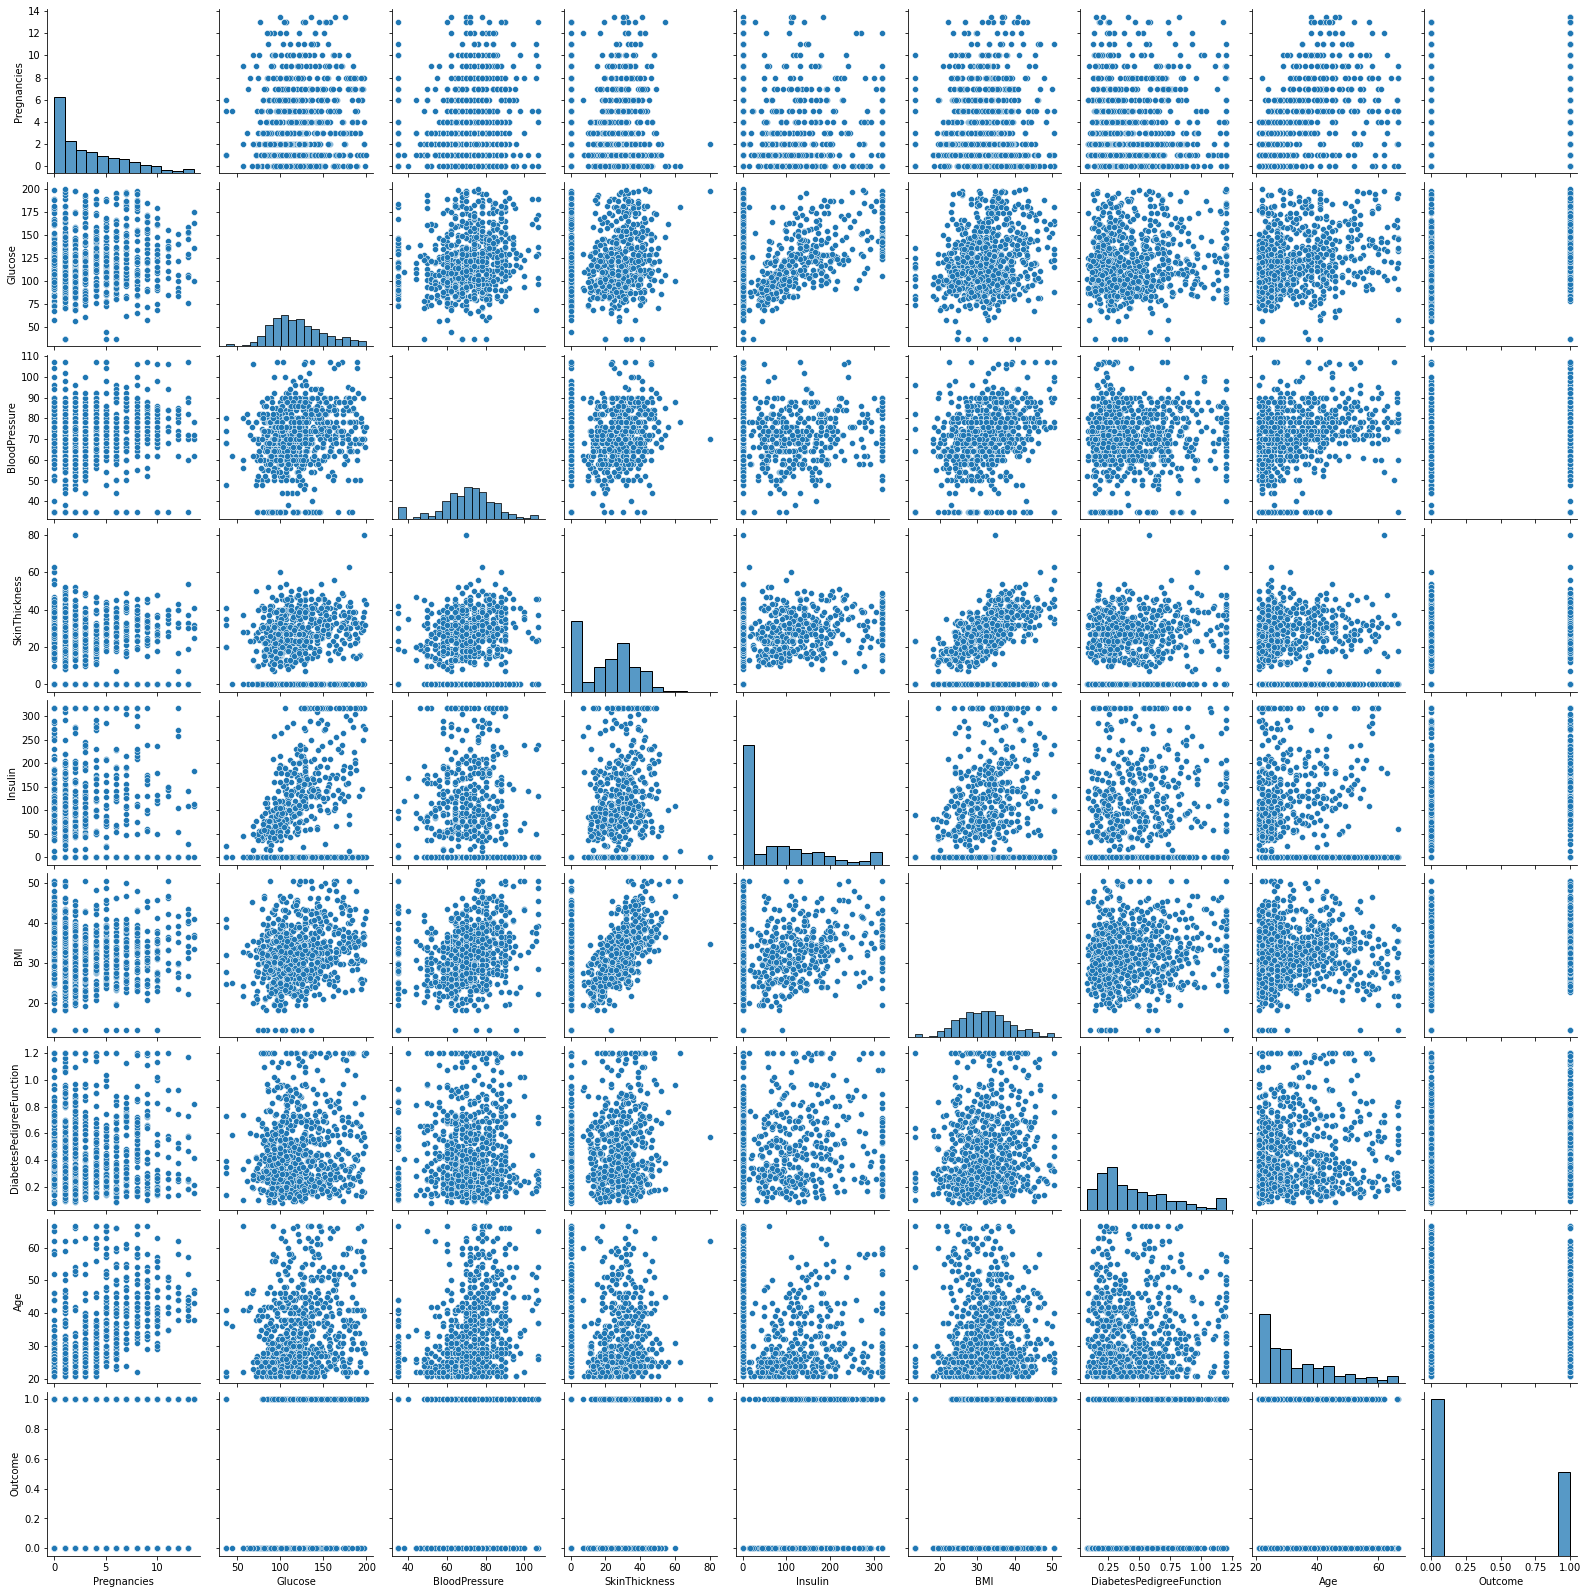

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df_p)

### 1-3 앞선 두 단계에서 얻은 향후 분석시 고려사항 작성

In [12]:
#변수가 모두 연속형이고 정규분포를 따르지 않는 것으로 보인다. 로그변환을 사용할 필요가 있다
#타겟 변수에서 0이 더 많기 때문에 샘플링이 필요하다
#변수간 상관관계가 크지 않다.

# 문제 2

### 2-1 오버샘플링 과정 설명하고 결과 작성

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

train_df = df_p.drop(['Outcome'], axis=1)
target_df = df_p['Outcome']

train_over, target_over = SMOTE(random_state=0).fit_resample(train_df, target_df)

X_train, X_test, y_train, y_test = train_test_split(train_over, target_over, test_size=0.2, stratify=target_over, random_state=0)

lr = LogisticRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

print(confusion_matrix(pred, y_test))

print(classification_report(pred, y_test))

[[82 26]
 [18 74]]
              precision    recall  f1-score   support

           0       0.82      0.76      0.79       108
           1       0.74      0.80      0.77        92

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.78      0.78      0.78       200



C:\Users\s7s71\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 2-2 언더샘플링 과정 설명하고 결과 작성

In [14]:
from imblearn.under_sampling import NearMiss

NM = NearMiss(version=1, n_neighbors=2)
train_under, target_under = NM.fit_resample(train_df, target_df)

X_train, X_test, y_train, y_test = train_test_split(train_under, target_under, test_size=0.2, stratify=target_under, random_state=0)

lr = LogisticRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

print(confusion_matrix(pred, y_test))

print(classification_report(pred, y_test))

[[38 15]
 [16 39]]
              precision    recall  f1-score   support

           0       0.70      0.72      0.71        53
           1       0.72      0.71      0.72        55

    accuracy                           0.71       108
   macro avg       0.71      0.71      0.71       108
weighted avg       0.71      0.71      0.71       108



C:\Users\s7s71\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 2-3 둘 중 선택하고 이유 설명

In [15]:
#데이터량이 768개로 적은 편이기 떄문에 샘플량을 더 적게하는 언더샘플링은 효율적이지 못할 것이다.

# 문제 3

### 3-1 최소 3개 이상 알고리즘 제시하고 정확도 측면의 모델 1개와 속도 측면의 모델 1개를 꼭 구현(총 2개 이상)

In [16]:

from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier

train_df = df_p.drop(['Outcome'], axis=1)
target_df = df_p['Outcome']

X_train, X_test, y_train, y_test = train_test_split(train_df, target_df, test_size=0.2, stratify=target_df, random_state=0)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

gbm = GradientBoostingClassifier()
gbm.fit(X_train, y_train)
gbm_pred = gbm.predict(X_test)

print(classification_report(dt_pred, y_test))
print(classification_report(gbm_pred, y_test))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78       109
           1       0.50      0.60      0.55        45

    accuracy                           0.71       154
   macro avg       0.66      0.68      0.67       154
weighted avg       0.73      0.71      0.71       154

              precision    recall  f1-score   support

           0       0.89      0.82      0.86       108
           1       0.65      0.76      0.70        46

    accuracy                           0.81       154
   macro avg       0.77      0.79      0.78       154
weighted avg       0.82      0.81      0.81       154



### 3-2 모델 비교하고 결과 설명

In [17]:
#precision, recall, f1-score 모든 부분에서 GBM이 성능이 좋다. 데이터양이 많지 않기 때문에 두 모델의 속도 차이가 적다.

### 3-3 속도 개선을 위한 차원 축소 설명하고 수행, 예측 성능과 속도 비교하고 결과 작성

In [18]:
from sklearn.preprocessing import StandardScaler
train_df_scaled = StandardScaler().fit_transform(train_df)

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=8)

pca.fit(train_df_scaled)
train_pca = pca.transform(train_df_scaled)
print(train_pca.shape)

(768, 8)


In [24]:
import numpy as np

result = pd.DataFrame({'설명가능한 분산 비율(고윳값)':pca.explained_variance_,
             '기여율':pca.explained_variance_ratio_},
            index=np.array([f"pca{num+1}" for num in range(train_df_scaled.shape[1])]))
result['누적기여율'] = result['기여율'].cumsum()
result

,설명가능한 분산 비율(고윳값),기여율,누적기여율
pca1,2.119971,0.264651,0.264651
pca2,1.801588,0.224905,0.489557
pca3,0.982316,0.122630,0.612186
pca4,0.880668,0.109940,0.722126
pca5,0.790170,0.098643,0.820769
pca6,0.652979,0.081516,0.902285
pca7,0.410370,0.051229,0.953514
pca8,0.372369,0.046486,1.000000


In [28]:
pca = PCA(n_components=6)

pca.fit(train_df_scaled)
train_pca = pca.transform(train_df_scaled)
print(train_pca.shape)

(768, 6)


In [29]:
pca_columns = ['pca_1','pca_2','pca_3','pca_4','pca_5','pca_6']
train_df_pca = pd.DataFrame(train_pca, columns=pca_columns)
train_df_pca.head()

,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6
0,-1.140025,1.155667,0.304036,0.494613,0.106066,0.422039
1,1.333832,-0.621502,-0.571083,0.433620,0.395560,-0.440039
2,0.422694,1.577764,1.996025,-0.453226,-0.873337,0.253746
3,1.298605,-1.234987,-0.700701,-0.507921,0.466084,-0.480054
4,-1.394430,-2.284310,2.084616,1.218545,-0.253329,1.778025


In [30]:
X_train, X_test, y_train, y_test = train_test_split(train_df_pca, target_df, test_size=0.2, stratify=target_df, random_state=0)

gbm = GradientBoostingClassifier()
gbm.fit(X_train, y_train)
gbm_pred = gbm.predict(X_test)

print(classification_report(gbm_pred, y_test))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87       107
           1       0.69      0.79      0.73        47

    accuracy                           0.82       154
   macro avg       0.79      0.81      0.80       154
weighted avg       0.83      0.82      0.83       154



# 문제 4 
금속 성분 함유량 데이터(변수 1개) - 제품에 금속 재질 함유량의 분산이 1.3을 넘으면 불량이라고 보고 있는데 제조사별로 차이가 난다고 제보를 받았으며, 분산에 대해 검정을 수행하시오. (유의확률 0.05)

#### dataset : /kaggle/input/adpkrp5/content.csv

### 4-1 연구가설과 귀무가설 작성

귀무가설 : 표본분산이 모분산(1.3)보다 작거나 같다.  
연구가설 : 표본분산이 모분산(1.3)보다 크다.

In [35]:
content_df = pd.read_csv('content.csv')
content_df

,content
0,97.995295
1,101.478315
2,102.284913
3,98.993634
4,104.635232
...,...
195,100.568703
196,99.082193
197,100.163027
198,99.327200


### 4-2 양측 검정

$\chi^2 = \frac{S}{\boldsymbol{\sigma}^2}$  
$S=(n-1) * s^2$ 

In [46]:
chi2_value = ((200-1)* (np.std(content_df, ddof=1)**2)) / 1.3
chi2_value

content    328.292298
dtype: float64

### 4-3 검정통계량, 가설 채택

$\chi^2_{0.95}(199) = 232.9$
  
카이제곱 통계량이 더 작으므로 귀무가설을 기각
-> 분산이 1.3보다 작으므로 불량이 아니다.

# 문제 5
Lot별 200개에 대한 불량 제품 수량 데이터(변수 2개 - lot번호, 불량제품수)    
/kaggle/input/adpkrp5/error.csv

### 5-1 불량률 관리도에 따라 관리중심선(CL : Center Line), 관리 상한선(UCL : Upper Control Limit), 하한선(LCL : Lower Control Limit) 구하기

In [42]:
error_df = pd.read_csv('error.csv')
error_df

,iot_number,error_case_number
0,1,4.5
1,2,2.5
2,3,2.0
3,4,3.0
4,5,0.5
...,...,...
95,96,2.0
96,97,3.0
97,98,5.5
98,99,2.0


In [43]:
defect = error_df['error_case_number']
size = 200

error_case_p = error_df['error_case_number']

p_mean=np.sum(defect)/(size*len(defect))

cl  = p_mean * size
ucl = cl + 3*np.sqrt((cl*(1-p_mean))) ## 3 sigma 내의 관리. 
lcl = 0

print('UCL:{}, CL:{}, LCL:{}'.format(round(ucl,2),round(cl,2),round(lcl,2)) )

UCL:8.9, CL:3.41, LCL:0


### 5-2 관리도 시각화

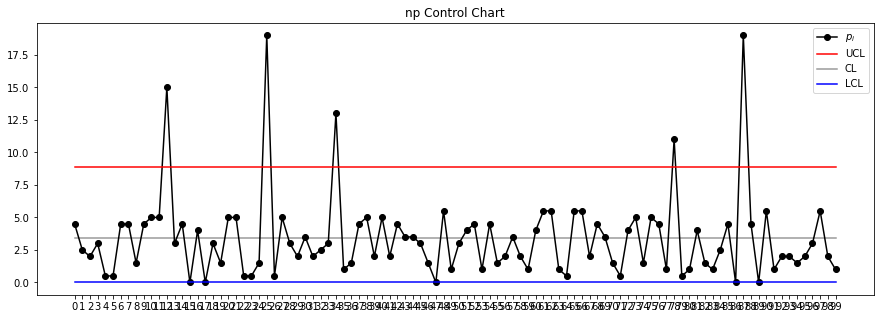

In [44]:
#np 차트
plt.figure(figsize=(15,5))
plt.plot(error_case_p,marker="o",color="k",label="$p_i$")
plt.plot([ucl]*len(defect),color="r",label="UCL")
plt.plot([cl]*(len(defect)),label="CL",color="k",alpha=0.4)
plt.plot([lcl]*len(defect),color="b",label="LCL")
plt.legend(loc="best")
plt.xticks(np.arange(len(defect)))
plt.title("np Control Chart")
plt.show()

# 문제 6
상품 a와 b가 있을 때 다음과 같은 구매 패턴이 있다고 한다. aa bb aaaa bbbb a b aa bb aa bbb aa bb a b 구매하는 패턴으로 보아 두 상품이 연관이 있는지 확인하라

### 6-1 연구가설과 귀무가설 작성

### 6-2 평균과 표준편차

### 6-3 가설 채택